In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [4]:
df = pd.read_csv('/content/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset.zip')

In [6]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


## **Data Wrangling**

In [8]:
#Check for missing Values
df.isnull().sum()
#there was no need of dropping any columns since none had missing data

,0
SEQN,0
age_group,0
RIDAGEYR,0
RIAGENDR,0
PAQ605,0
BMXBMI,0
LBXGLU,0
DIQ010,0
LBXGLT,0
LBXIN,0


In [16]:
#convert categorical data into numerical data
df['age_group'] = df['age_group'].map({'senior': 1, 'non-senior': 0})

# Display the data types
df.dtypes

,0
SEQN,float64
age_group,float64
RIDAGEYR,float64
RIAGENDR,float64
PAQ605,float64
BMXBMI,float64
LBXGLU,float64
DIQ010,float64
LBXGLT,float64
LBXIN,float64


In [17]:
# Display the first fields
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,NaN,61.0,NaN,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,NaN,26.0,NaN,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,NaN,16.0,NaN,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,NaN,32.0,NaN,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,NaN,38.0,NaN,1.0,35.9,103.0,2.0,81.0,10.92


In [15]:
pd.get_dummies(df,columns=['age_group'], drop_first=True)

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,61.0,NaN,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,26.0,NaN,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,16.0,NaN,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,32.0,NaN,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,38.0,NaN,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...
2273,83711.0,38.0,NaN,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,61.0,NaN,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,34.0,NaN,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,60.0,NaN,2.0,27.4,90.0,2.0,108.0,4.99


## **3. Exploratory Data Analysis (EDA):**

## Question 1: Can age be predicted using health and nutrition data from the dataset? **bold text**

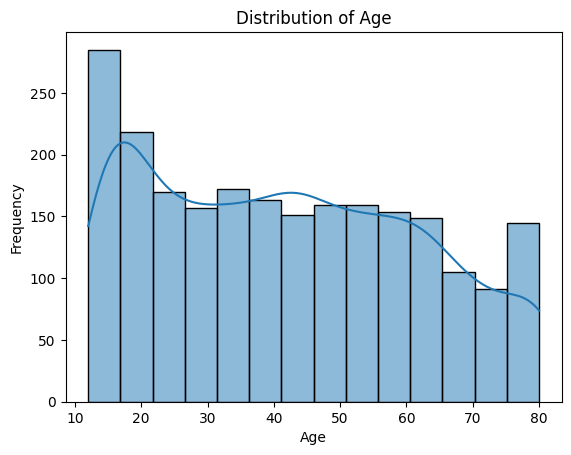

In [19]:
# Visualize the distribution of age
sns.histplot(df['RIDAGEYR'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

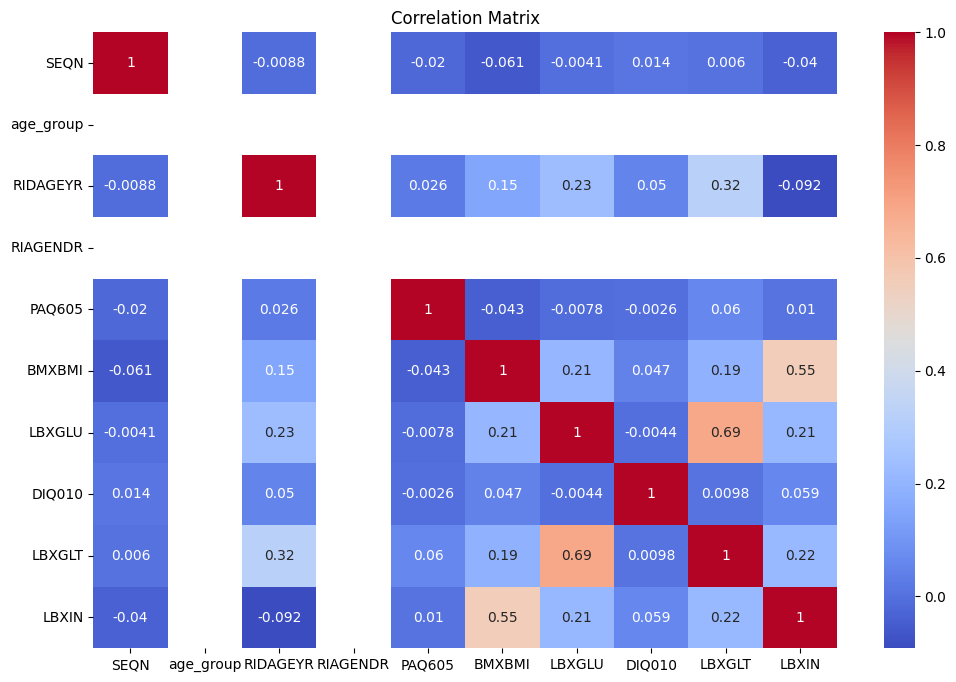

In [21]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## **Question 2: What is the relationship between lifestyle choices and age?**

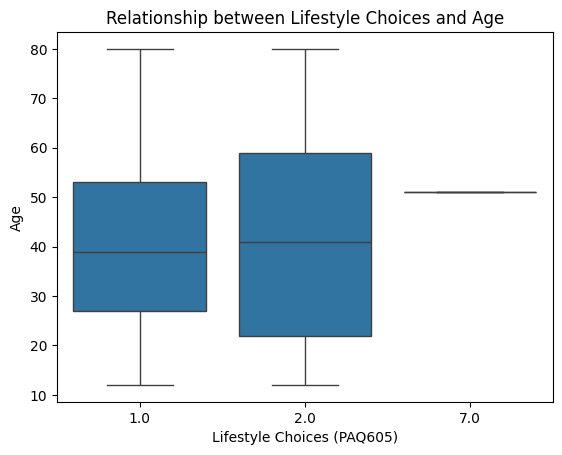

In [22]:
# Visualize the relationship between age and lifestyle choices (PAQ605)
sns.boxplot(x='PAQ605', y='RIDAGEYR', data=df)
plt.title('Relationship between Lifestyle Choices and Age')
plt.xlabel('Lifestyle Choices (PAQ605)')
plt.ylabel('Age')
plt.show()

## **Question 3: How does respondents’ gender and body mass index correlate with age_group?**

In [26]:
# Correlation between gender, BMI, and age_group
print(df[['age_group', 'RIAGENDR', 'BMXBMI']].corr())

           age_group  RIAGENDR  BMXBMI
age_group        NaN       NaN     NaN
RIAGENDR         NaN       NaN     NaN
BMXBMI           NaN       NaN     1.0


## **Question 4: Can LBXIN, body mass index, and PAQ605 be strong predictors of age?**

Mean Squared Error: 374.0867740246859
R-squared: 0.10326137019115733
        Coefficient
LBXIN     -0.473879
BMXBMI     0.714911
PAQ605     2.564959


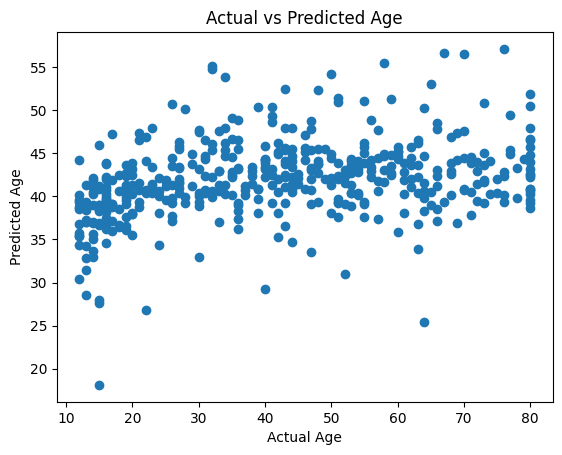

In [28]:
# Prepare the data for modeling
X = df[['LBXIN', 'BMXBMI', 'PAQ605']]
y = df['RIDAGEYR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Visualize the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Age')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.show()
